In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams['legend.fontsize'] = 'large'
# plt.rcParams['legend.fontsize:'] = 16

In [2]:
df=pd.read_csv("../data/religion.csv")
df.head()

,promney,rfrac
0,0.047790,0.00
1,0.051199,0.01
2,0.054799,0.02
3,0.058596,0.03
4,0.062597,0.04


Text(0.5,1,'Whole population')

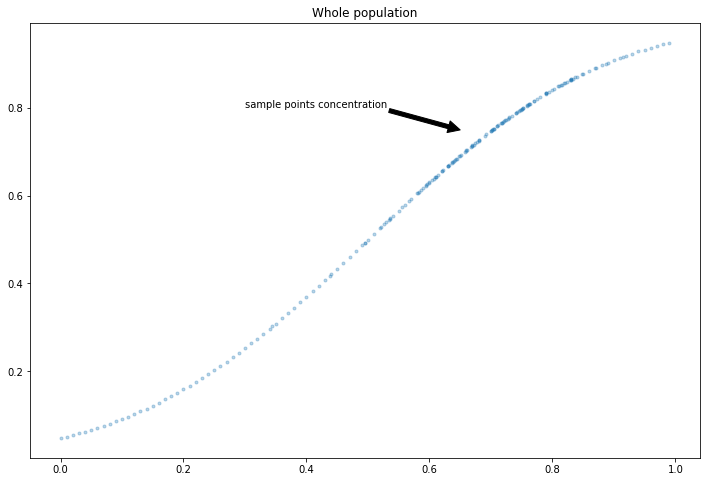

In [3]:
x=df.rfrac.values
f=df.promney.values
plt.plot(x,f,'.', alpha=0.3)
plt.annotate('sample points concentration', xy=[0.65, 0.75], xytext=[0.3,0.8], arrowprops=dict(facecolor='black'))
plt.title('Whole population')

Notice that our sampling of $x$ is not quite uniform: there are more points around 0.7.

In [4]:
dfsample = pd.read_csv('../data/noisysample.csv')
indexes = dfsample.i.values

In [5]:
dfpop = pd.read_csv('../data/noisypopulation.csv')
dfpop.head()

,x,f,y
0,0.00,0.047790,0.081350
1,0.01,0.051199,0.139959
2,0.02,0.054799,0.257228
3,0.03,0.058596,0.140571
4,0.04,0.062597,0.036211


In [6]:
samplex = x[indexes]
samplef = f[indexes]

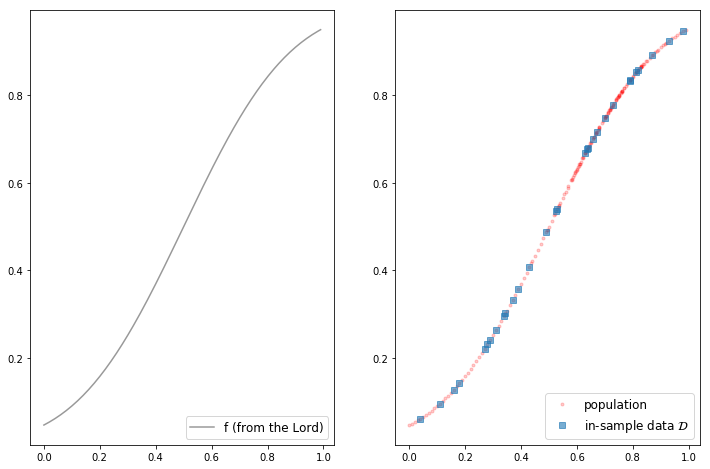

In [7]:
fig, axes = plt.subplots(1,2)
axes[0].plot(x,f, 'k-', alpha=0.4, label="f (from the Lord)");
axes[1].plot(x,f, 'r.', alpha=0.2, label="population");
axes[1].plot(samplex,samplef, 's', alpha=0.6, label="in-sample data $\cal{D}$");
axes[0].legend(loc=4);
axes[1].legend(loc=4);

# Statment of the learning problem

Without noise, we have learn g from hypothesis space $\cal{H}$ so that the ERM is small. We hope that the out-of-sample risk of g is also small. Mathematically, we have: 

$$A: R_{\cal{D}}(g) \text{ smallest on }\cal{H}$$
and
$$B: R_{out}(g) \approx R_{\cal{D}}(g)$$

## Stochastic noise

Most real-world data sets are not smooth at all, because of various effects such as measurement errors, other co-variates, and so on.

Stochastic noise bedevils almost every data set known to humans, and happens for many different reasons.

Due to stochastic noise, our estimation won't be the perfect, god-given, $f$ but rather some noisy estimation of it.

In [8]:
x = dfpop.x.values
f = dfpop.f.values
y = dfpop.y.values

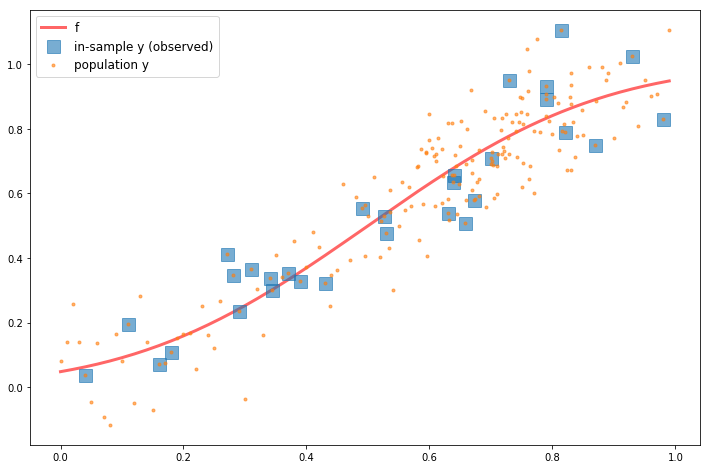

In [9]:
plt.plot(x,f, 'r-', alpha=0.6, lw=3, label='f')
plt.plot(x[indexes], y[indexes], 's', markersize=13, alpha=0.6, label='in-sample y (observed)')
plt.plot(x, y, '.', alpha=0.6, label='population y')
plt.legend(loc='best')

# Fitting a noisy model

We now fit noisy data using $g_1$ and $g_{20}$. Because of the noisyness of data, we add to the model an $\epsilon$ term: $$y = f(x) + \epsilon,$$

where $\epsilon$ is a **random** noise term that represents the stochastic noise.

## Describing things probabilistically

![noisy model](gfx/NoisyModelPxy.png)

Since we model noisyness, given x and f, we do not know exactly y, since we do not know how much noise we have at any given x. Thus we need to model y at a given x, $p(y|x)$. Since $p(x)$ is also a probability distribution, we have: $$p(x,y) = p(y|x)p(x)$$

**Key**: The learning problem can be cast now as a problem in probability density estimation: if we can estimate $p(x,y)$ and take actions based on that estimate thanks to our risk and error functional, we are done.

In [10]:
g1 = np.poly1d(np.polyfit(x[indexes],f[indexes],1))
g20 = np.poly1d(np.polyfit(x[indexes],f[indexes],20))

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RankWarning: Polyfit may be poorly conditioned
  


In [11]:
g1noisy = np.poly1d(np.polyfit(x[indexes],y[indexes],1))
g20noisy = np.poly1d(np.polyfit(x[indexes],y[indexes],20))

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RankWarning: Polyfit may be poorly conditioned
  


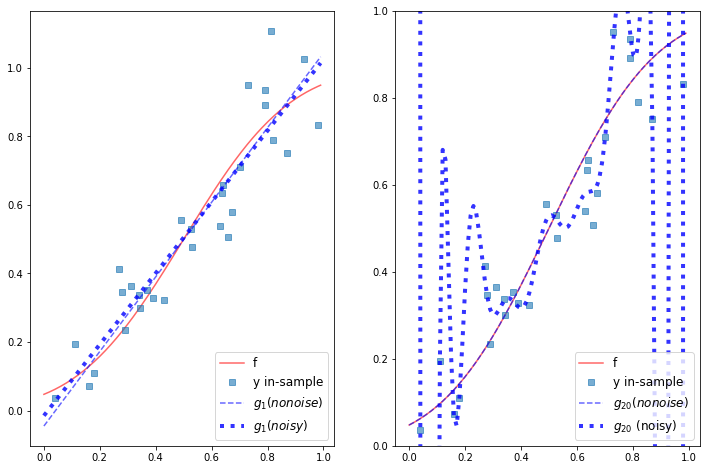

In [12]:
fig, axes = plt.subplots(1,2)
axes[0].plot(x,f, 'r-', alpha=0.6, label="f");
axes[1].plot(x,f, 'r-', alpha=0.6, label="f");
axes[0].plot(x[indexes],y[indexes], 's', alpha=0.6, label="y in-sample");
axes[1].plot(x[indexes],y[indexes], 's', alpha=0.6, label="y in-sample");
axes[0].plot(x,g1(x),  'b--', alpha=0.6, label="$g_1 (no noise)$");
axes[0].plot(x,g1noisy(x), 'b:', lw=4, alpha=0.8, label="$g_1 (noisy)$");
axes[1].plot(x,g20(x),  'b--', alpha=0.6, label="$g_{20} (no noise)$");
axes[1].plot(x,g20noisy(x), 'b:', lw=4, alpha=0.8, label="$g_{20}$ (noisy)");
axes[1].set_ylim(0,1)
axes[0].legend(loc=4);
axes[1].legend(loc=4);

One the left, g1 does not change much when noises were added. Whereas, g20 changes a lot when the same is done. This is a disaster what g20 did was to try to fit the noise.

We can see this more clearly by plotting the population

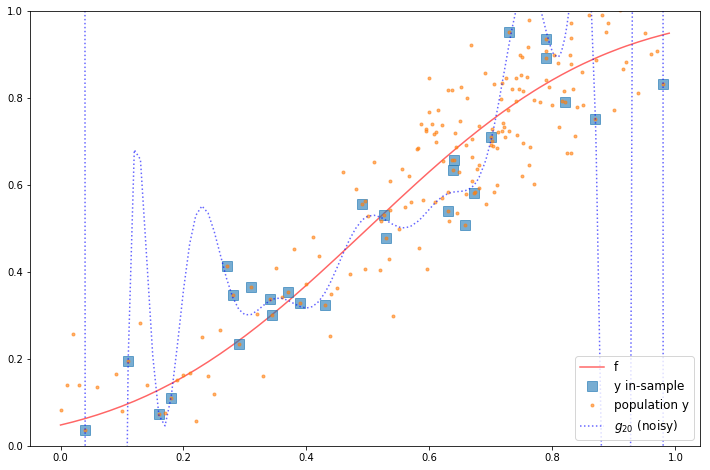

In [13]:
plt.plot(x,f, 'r-', alpha=0.6, label="f");
plt.plot(x[indexes],y[indexes], 's', alpha=0.6, markersize=10, label="y in-sample");
plt.plot(x,y,  '.', alpha=0.6, label="population y");
plt.plot(x,g20noisy(x), 'b:', alpha=0.6, label="$g_{20}$ (noisy)");
plt.ylim([0,1])
plt.legend(loc=4);

g20 does well at places where we have more data points. It does very badly when we do not have enough sample points (e.g., at bottom left corner). This is called **overfitting**. 

g20 does very well when there is no noise, which is never true in practice. But it suffers miserabily when there is noise as it is in practice. The lesson here is that we must ensure that our **model does not fit the noise**.

Let's compare the errors.

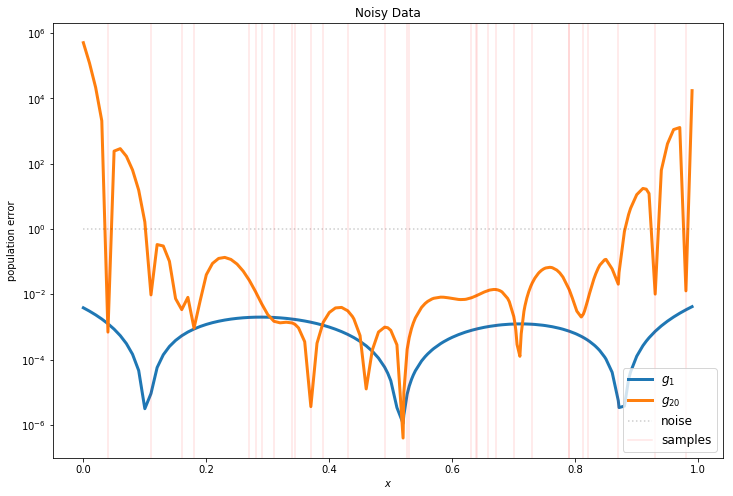

In [19]:
plt.plot(x, ((g1noisy(x)-f)**2), lw=3, label="$g_1$")
plt.plot(x, ((g20noisy(x)-f)**2), lw=3,label="$g_{20}$");
plt.plot(x, [1]*x.shape[0], "k:", label="noise", alpha=0.2);
for i in indexes[:-1]:
    plt.axvline(x[i], 0, 1, color='r', alpha=0.1)
plt.axvline(x[indexes[-1]], 0, 1, color='r', alpha=0.1, label="samples")
plt.xlabel("$x$")
plt.ylabel("population error")
plt.yscale("log")
plt.legend(loc=4);
plt.title("Noisy Data");

g1 has much less erros than g20. So in the presense of noise, simpler model is better.

# The Variance of your model

The tendency of complex model to overfit, by having freedom to fit the noise, is called **high variance**. What is the model's variance?

Variance, simply put, is the “error-bar” or spread in models that would be learnt by training on different data sets $\cal{D}_1, \cal{D}_2, \dots$
drawn from the population. Now, this seems like a circular concept, as in real-life, you do not have access to the population. But since we simulated our data here anyways, we do, and so let us see what happens if we choose different 30 points randomly from our population of 200, and fit models in both $g_1$ and $g_{20}$ to them. We do this on 200 sets of randomly chosen (from the population) data sets of 30 points each and plot the best fit models in noth hypothesis spaces for all 200 sets.

In [20]:
def gen(degree, nsims, size, x, out):
    outpoly=[]
    for i in range(nsims):
        indexes=np.sort(np.random.choice(x.shape[0], size=size, replace=False))
        pc=np.polyfit(x[indexes], out[indexes], degree)
        p=np.poly1d(pc)
        outpoly.append(p)
    return outpoly

In [21]:
polys1 = gen(1, 200, 30,x, y);
polys20 = gen(20, 200, 30,x, y);

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:5: 

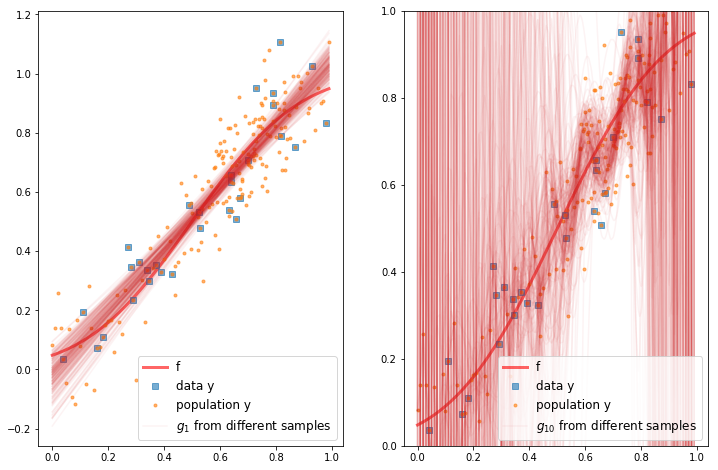

In [26]:
fig, axes = plt.subplots(1,2)
axes[0].plot(x,f, 'r-', lw=3, alpha=0.6, label="f");
axes[1].plot(x,f, 'r-', lw=3, alpha=0.6, label="f");
axes[0].plot(x[indexes], y[indexes], 's', alpha=0.6, label="data y");
axes[1].plot(x[indexes], y[indexes], 's', alpha=0.6, label="data y");
axes[0].plot(x, y, '.', alpha=0.6, label="population y");
axes[1].plot(x, y, '.', alpha=0.6, label="population y");
c=sns.color_palette()[3]
for i,p in enumerate(polys1[:-1]):
    axes[0].plot(x,p(x), alpha=0.05, c=c)
axes[0].plot(x,polys1[-1](x), alpha=0.05, c=c,label="$g_1$ from different samples")
for i,p in enumerate(polys20[:-1]):
    axes[1].plot(x,p(x), alpha=0.05, c=c)
axes[1].plot(x,polys20[-1](x), alpha=0.05, c=c, label="$g_{10}$ from different samples")
axes[1].set_ylim(0,1)
axes[0].legend(loc=4);
axes[1].legend(loc=4);

The left panel shows 200 models $g_1$ that stick together even they don't quite capture $f$ or the data squares very well.

The right panel shows 200 models $g_20$. Obvious a disaster! The models still band together around the central trend of f and data, a substantial amount of models veer off into all kinds of direction over the plot. This is **variance**: the prediction at any given x are all over the place.

Another view of variance can be seen by plotting the coefficients of the polynomial fit. Below we plot the coefficients of the fit in $g_1$. The variacn is barely 0.2 around the mean for both coefficients. 

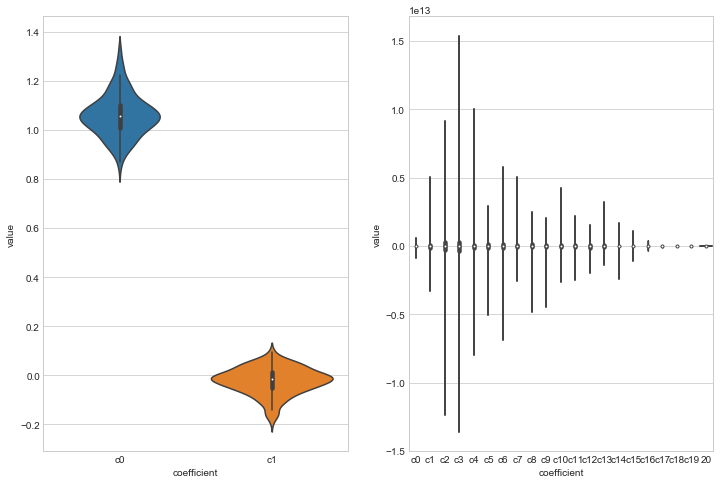

In [164]:
pdict1={}
pdict20={}

for i in range(2):
    pdict1[i]=[]
    for j, p in enumerate(polys1):
        pdict1[i].append(p.c[i])
        
for i in reversed(range(21)):
    pdict20[i]=[]
    for j, p in enumerate(polys20):
        pdict20[i].append(p.c[i]) 
df1=pd.DataFrame(pdict1)
df20=pd.DataFrame(pdict20)

# plotting
fig ,axes = plt.subplots(1,2)

# g1 model
df1.rename(columns={0: 'c0', 1:'c1'}, inplace=True);
df1melt = pd.melt(df1,  value_vars=['c0', 'c1'], var_name='coefficient')
sns.violinplot(y="value", x="coefficient", data=df1melt, ax=axes[0]);

# g20 model
columns = dict()
for i in range(20):
    columns[i] = 'c' + str(i)
df20.rename(columns=columns, inplace=True);
df20melt = pd.melt(df20,  value_vars=df20.columns, var_name='coefficient')
sns.violinplot(y="value", x="coefficient", data=df20melt, ax=axes[1]);

We can see that there is a lof of variance in the coefficients of g20 model.

# Bias and Variance Tradeoff

In the above section, we talks about the bias and the variance of g1 and g20. We want to mathematically charactize these descriptions.

What we want is to define **bias** and **variance** for a given estimation method.
We have so far informally described two different concepts: bias and variance. Bias is deterministic error, the kind of error you get when your model is not expressive enough to describe the data. Variance describes the opposite problem, where it is too expressive.

Every model has some bias and some variance. Clearly, you dont want either to dominate, which is something we'll worry about soon.

Let us mathematically understand what bias and variance are, so that we can use these terms more precisely from now onwards. Follow carefully to see how our calculation mimics the code/process we used above.

$$\renewcommand{\gcald}{g_{\cal D}}$$
$$\renewcommand{\ecald}{E_{\cal{D}}}$$

We had from [noiseless learning](noiseless_learning.html):

$$R_{out}(h) =  E_{p(x)}[(h(x) - f(x))^2] = \int dx p(x)  (h(x) - f(x))^2 .$$

In the presence of noise $\epsilon$ which we shall assume to be 0-mean, variance $\sigma^2$ noise, we have $y = f(x) + \epsilon$ and the above formula becomes:

$$R_{out}(h) =  E_{p(x)}[(h(x) - y)^2] = \int dx p(x)  (h(x) - f(x) - \epsilon)^2 .$$

Now let us use Empirical Risk minimization to fit on our training set. We come up with a best fit hypothesis $h = \gcald$, where $\cal{D}$ is our training sample.

$$R_{out}(\gcald) =  E_{p(x)}[(\gcald(x) - f(x) - \epsilon)^2] $$

Let us compute the expectation of this quantity with respect to the sampling distribution obtained by choosing different samples from the population. Note that we cant really do this if we have been only given one training set, but in this document, we have had access to the population and can thus experiment.

Define:

$$\langle  R \rangle = E_{\cal{D}} [R_{out}(\gcald)] =  E_{\cal{D}}E_{p(x)}[(\gcald(x) - f(x) - \epsilon)^2] $$

$$
\begin{eqnarray*}
=& E_{p(x)}\ecald[(\gcald(x) - f(x) - \epsilon)^2]\\
=& E_{p(x)}[\ecald[\gcald^2] +  f^2 + \epsilon^2 - 2\,f\,\ecald[\gcald]]
\end{eqnarray*}
$$

Note that $$
\begin{eqnarray*}
 E_{p(x)}E_{\cal{D}}\big[2f(x)\epsilon - 2\epsilon g_{\cal{D}}(x)\big] &= 2E_{\cal{D}}[E_{p(x)}[\epsilon] E_{p(x)}(f(x) - g_{\cal{D}}(x))]\\
&= 0
\end{eqnarray*}$$

Since $E_{p(x)}[\epsilon] = 0$ ( and is uncorrelated with x).

Define:

$$ \bar{g} = \ecald[\gcald] = (1/M)\sum_{\cal{D}} \gcald$$

as the average "g" over all the fits (M of them) on the different samples, so that we can write, adding and subtracting $\bar{g}^2$:

$$\langle  R \rangle =  E_{p(x)}[\ecald[\gcald^2] - \bar{g}^2 +  f^2 - 2\,f\,\bar{g} + \bar{g}^2 + \epsilon^2 ] = E_{p(x)}[\ecald[(\gcald - \bar{g})^2]  +  (f - \bar{g})^2 + \epsilon^2 ]$$

Thus:

$$\langle  R \rangle =  E_{p(x)}[\ecald[(\gcald - \bar{g})^2]] + E_{p(x)}[(f - \bar{g})^2] + \sigma^2$$

The first term here is called the **variance**, and captures the squared error of the various fit g's from the average g, or in other words, the hairiness. The second term is called the **bias**, and tells us, how far the average g is from the original f this data came from. Finally the third term is the **stochastic noise**, the minimum error that this model will always have.

Note that if we set the stochastic noise to 0 we get back the noiseless model we started out with. So even in a noiseless model, we do have bias and variance. This is because we still have sampling noise in such a model, and this is one of the sources of variance.